# Credit EDA 

In [1]:
#Import the useful Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",100)

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings(action="ignore")

### Reading the input data from file

In [3]:
# Read the file of "application_data.csv" in df1
df1 = pd.read_csv("application_data.csv")


In [4]:
#print the head of the data frame.
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Understanding the structure of data

In [5]:
# Checking the columns of the application dataset
df1.shape

(307511, 122)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Let us check the datatypes of each columns in dataframe
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
# Descriptive Statistics
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Missing Value Check

In [9]:
# Checking the null values present in each column of the DataFrame
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
df1.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [11]:
# let us check the columns which have null values greater than 40%
unwanted_col = df1.isnull().sum()/len(df1)*100
unwanted_col = unwanted_col[unwanted_col>50]
unwanted_col

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [12]:
len(unwanted_col)

41

I've identified that 41 columns in the 'df1' dataframe contain more than 50% missing values.  To enhance the stability and efficiency of our analysis and to derive meaningful insights from the data, I have decided to remove these columns from the
'df1' dataframe."

In [13]:
# Let's drop the columns which have more than 40% of null values
df1 = df1.drop(columns=unwanted_col.index)

In [14]:
# Let us check the shape of the dataframe after removing columns
df1.shape

(307511, 81)

In [15]:
#Let us check the columns name after droping the 50% of null values
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [16]:
# Let's check the null values after dropping 50% of missing value
df1.isnull().sum()/len(df1)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [17]:
# For columns having missing value less than 13%
col_lessthan_13_nullvalue = df1.isnull().sum()/len(df1)*100
col_lessthan_13_nullvalue= col_lessthan_13_nullvalue[col_lessthan_13_nullvalue<13]
col_lessthan_13_nullvalue

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [18]:
len(col_lessthan_13_nullvalue)

65

There are total 65 columns in "df1" dataset which have less than 13% of missing value

#### Let us check which columns are categorical and which columns are numerical

In [19]:
df1.columns[df1.nunique()<60]

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG

In [20]:
df1.columns[df1.nunique()>=60]

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

Group the columns into two categories
1. Cat_col : Columns having less than 60 unique numeric values
2. Cont_col : Columns having more than or equal to 60 unique numeric values


In [21]:
Cat_col = df1.columns[df1.nunique()<60]
Cat_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','ORGANIZATION_TYPE'
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE' ,'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

As 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']  are not important columns for the further analysis
       

In [22]:
Cont_col = df1.columns[df1.nunique()>=60]
Cont_col = ['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']

Final list of grouped columns

In [23]:
Cat_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','ORGANIZATION_TYPE'
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE' ,'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Cont_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']

### Approach of imputing missing values

When addressing missing values, the imputation strategy varies for numerical and categorical columns are different. 
For numerical columns, utilizing the median or mean for imputation is common. Imputing the median value is considered a
superior approach compared to using the mean, as the median is less sensitive to outliers, resulting in a more robust imputation method."For categorical columns, mode is the best method for imputation

#### handling missing values in Categorical column.

#### handling missing values in Numerical column.

I've opted not to impute columns with less than 13% missing values in the dataset. I shared my strategy for imputation in both categorical and numerical columns.
In the case of numerical columns, using the median for imputation is preferable over the mean due to its resilience against 
outliers and in the case of categorical value, mode is the good option. As the mode refers to the value or values that appear most frequently in a dataset. 

### Handling Outliers

In [24]:
print(Cont_col)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']


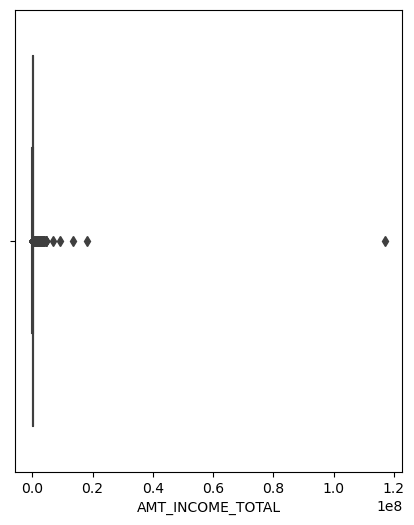

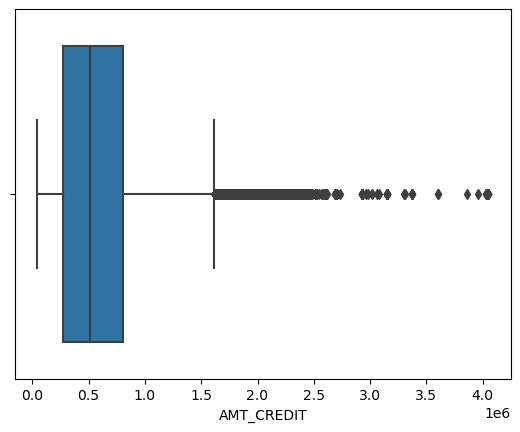

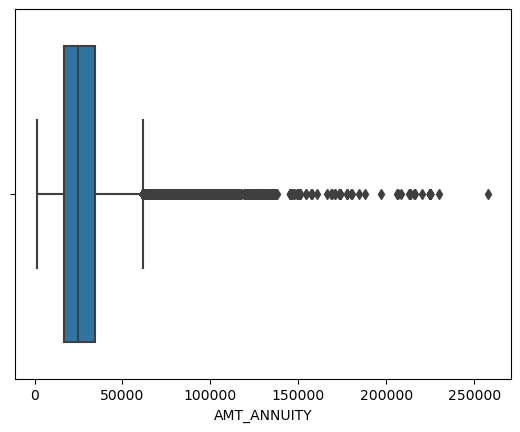

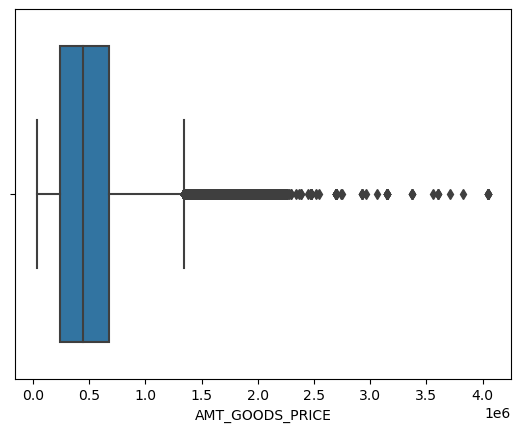

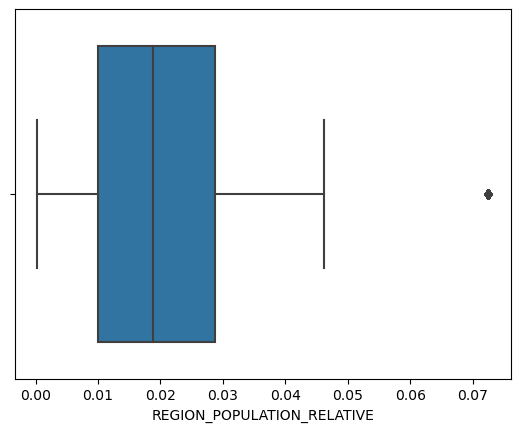

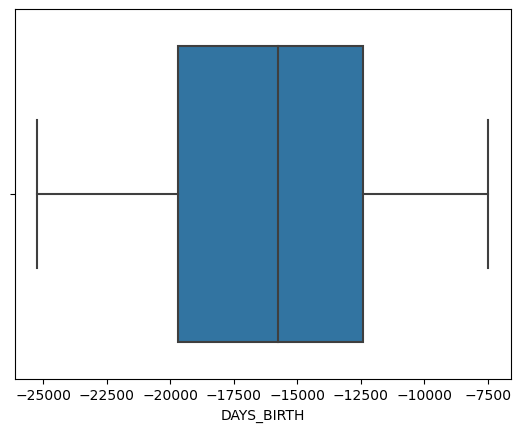

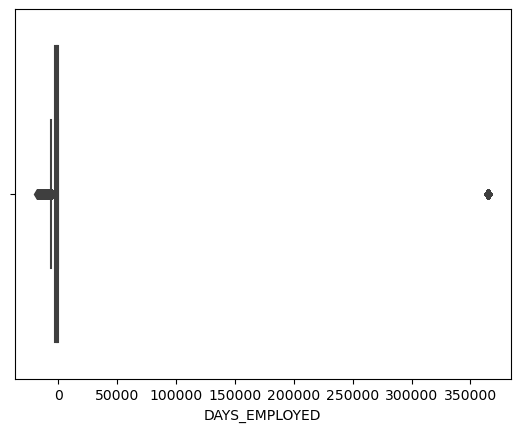

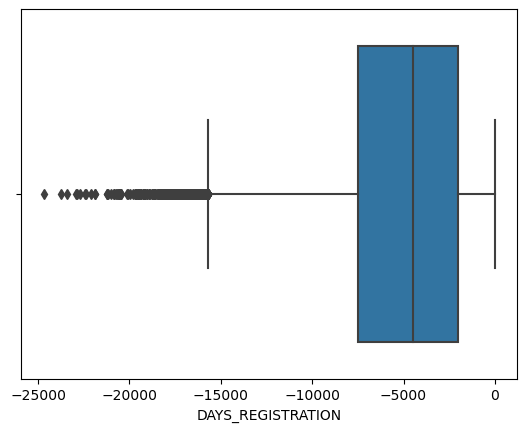

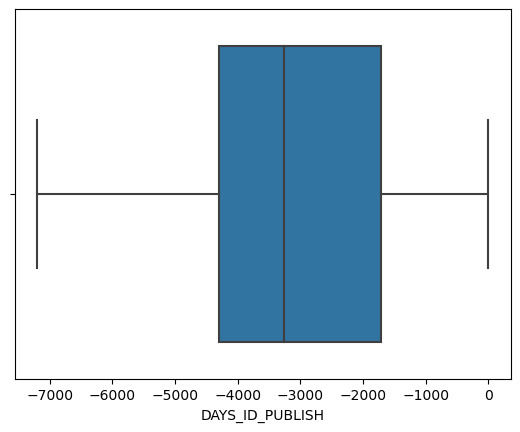

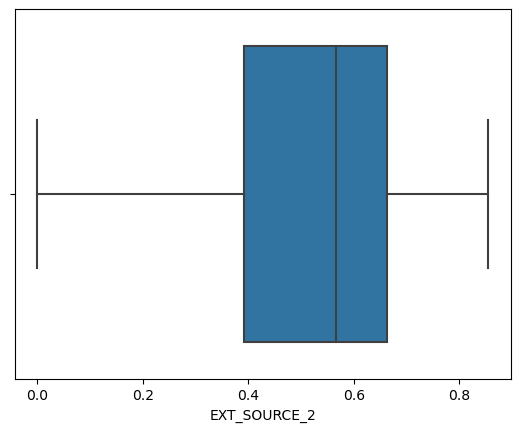

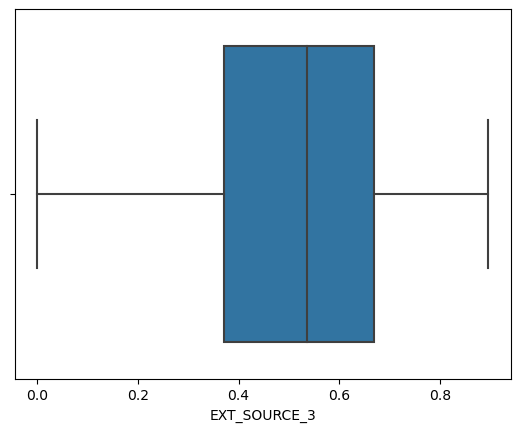

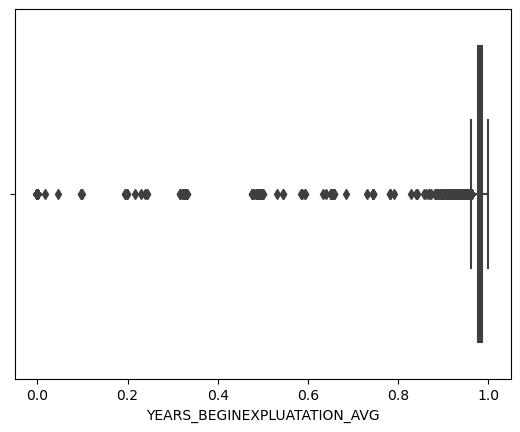

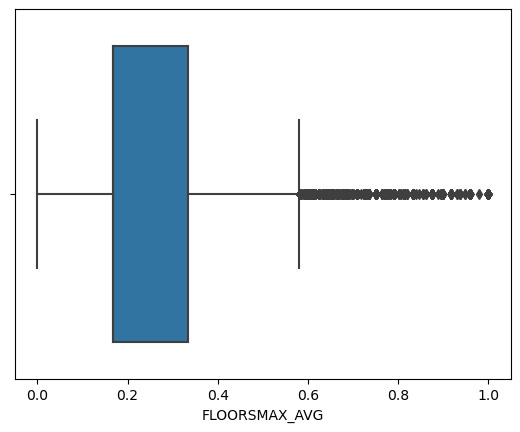

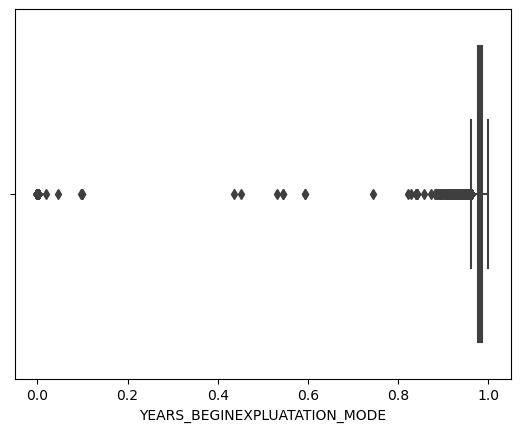

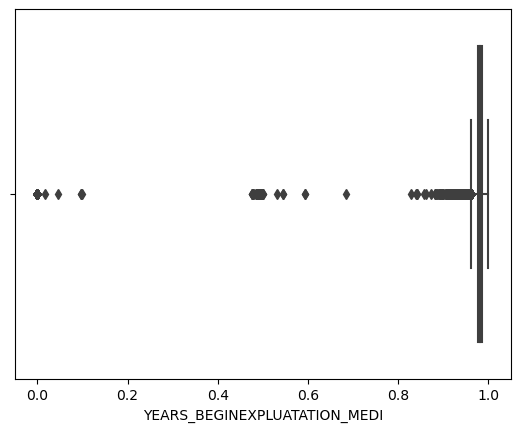

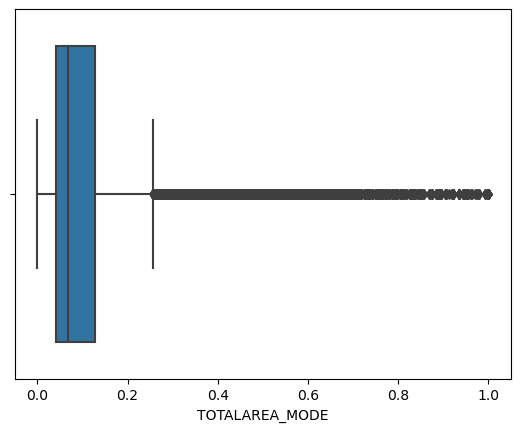

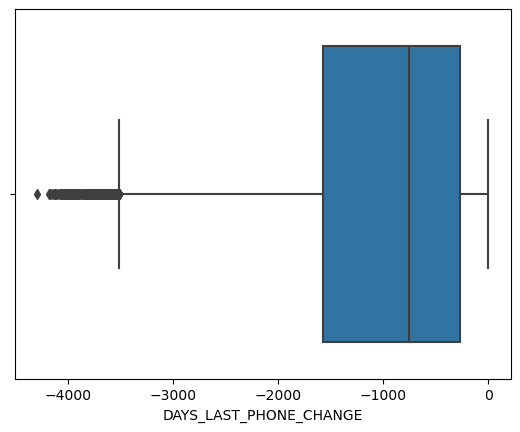

In [25]:
plt.figure(figsize=[5,6])
for cols in Cont_col:
    sns.boxplot(x=df1[cols])
    plt.show()

#### Five columns where outlier treatment are required and the approach to treat outlier-

        -AMT_INCOME_TOTAL
        -AMT_CREDIT
        -AMT_ANNUITY
        -AMT_GOODS_PRICE
        -DAYS_LAST_PHONE_CHANGE

### APPROCAH TO PERFORM OUTLIER TREATMENT

### Standardising values

In [26]:
df1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [27]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


There are some numerical columns having negative values.So I will convert those negative columns into positive by using abs() 
fumctions.

In [28]:
df1["DAYS_BIRTH"] = df1["DAYS_BIRTH"].abs()
df1["DAYS_EMPLOYED"] =df1["DAYS_EMPLOYED"].abs()
df1["DAYS_REGISTRATION"] =df1["DAYS_REGISTRATION"].abs()
df1["DAYS_ID_PUBLISH"] =df1["DAYS_ID_PUBLISH"].abs()

In [29]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


 Convert the day into years

In [30]:
df1['YEAR_BIRTH'] = df1["DAYS_BIRTH"].apply(lambda x:round(abs(x)/365))
df1['YEAR_EMPLOYED'] = df1["DAYS_EMPLOYED"].apply(lambda x:round(abs(x)/365))
df1['YEAR_REGISTRATION'] = df1["DAYS_REGISTRATION"].apply(lambda x:round(abs(x)/365))
df1['YEAR_ID_PUBLISH'] = df1["DAYS_ID_PUBLISH"].apply(lambda x:round(abs(x)/365))


In [31]:
# Checking all the columns of df1
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

### BINNING

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [32]:
# Creating bins for AMT_INCOME_TOTAL amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
ranges = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels= ranges)

In [33]:
# Creating bins for AMT_CREDIT amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
ranges = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df1['AMT_CREDIT_RANGE']=pd.cut(df1['AMT_CREDIT'],bins=bins,labels=ranges)

pd.cut is a function provided by the pandas library in Python. It is used for binning or categorizing continuous data
into discrete intervals, which is particularly useful when you want to analyze or visualize data in a grouped or 
summarized form. This function is often used with numerical data to create categorical bins.
Here we have two new columns in the DataFrame 'AMT_INCOME_RANGE' and 'AMT_CREDIT_RANGE' where each value from the
columns "AMT_INCOME_TOTAL" and "AMT_CREDIT" is replaced by the bin label based on the given interval.
This function provides a flexible way to segment and analyze numerical data.

In [34]:
# Let's check binned columns get added in the dataset
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,100000-125000,500000-550000


### Calculation of percentage imbalance

In [35]:
df1["TARGET"].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In the 'application_data' dataframe, 91.92% of individuals fall into the non-defaulters category, 
while 8.07% of individuals are classified as defaulters.







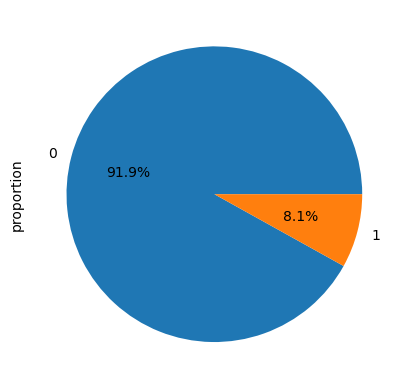

In [41]:
df1["TARGET"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()



In [42]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target0 = df1.loc[df1["TARGET"]==0]
target1 = df1.loc[df1["TARGET"]==1]

In [43]:
# Checking the no.of target variable 1 and target variable 0
print(len(target0))
print(len(target1))

282686
24825


In [44]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,14,1,75000-100000,450000-500000


In [45]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7,18,5,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,3,3,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,0,12,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,1001,15,12,75000-100000,250000-300000


### Univariate analysis 

#### Univariate analysis for Categorical columns

In [46]:
Cat_col

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'ORGANIZATION_TYPEREGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

#### Performing Univariate analysis on "CODE_GENDER" for defaulters and Non-defaulters.

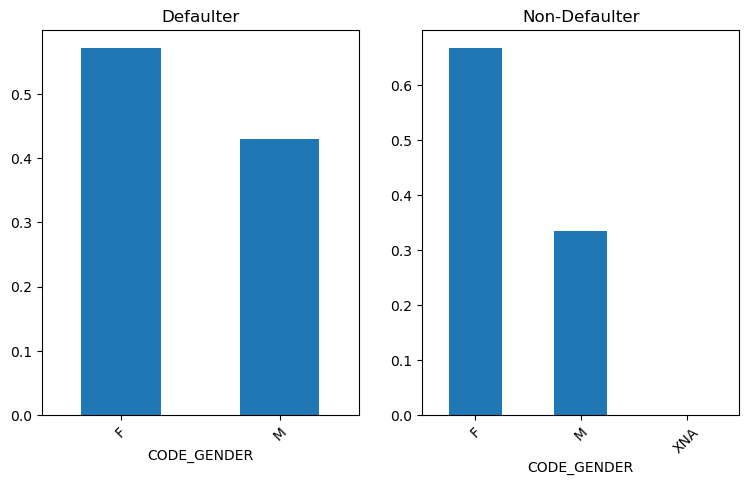

In [47]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["CODE_GENDER"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.savefig("fig1")
plt.show()


Conclusion

Females are taking more loans as compared to male.

#### Performing Univariate analysis on "NAME_INCOME_TYPE"  for defaulters and Non-defaulters.

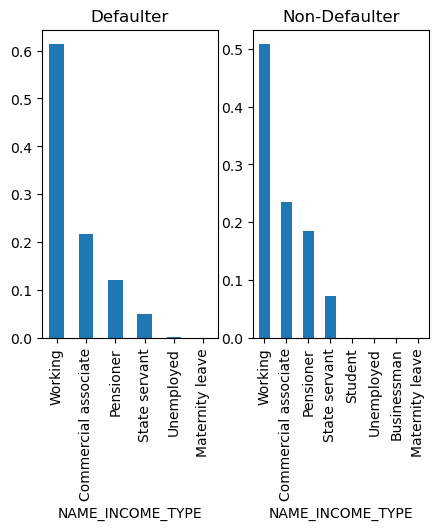

In [48]:
plt.figure(figsize=[5,4])
plt.subplot(1,2,1)
target1["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig2")
plt.show()


Conclusion-

1.For income type 'working', 'commercial associate', and 'Pensioner' the number of credits are higher than others.

2.Less number of credits for income type ,'Businessman','student','Unemployed' and 'Maternity leave'.

#### Performing Univariate analysis on "WEEKDAY_APPR_PROCESS_START"  for defaulters and Non-defaulters.

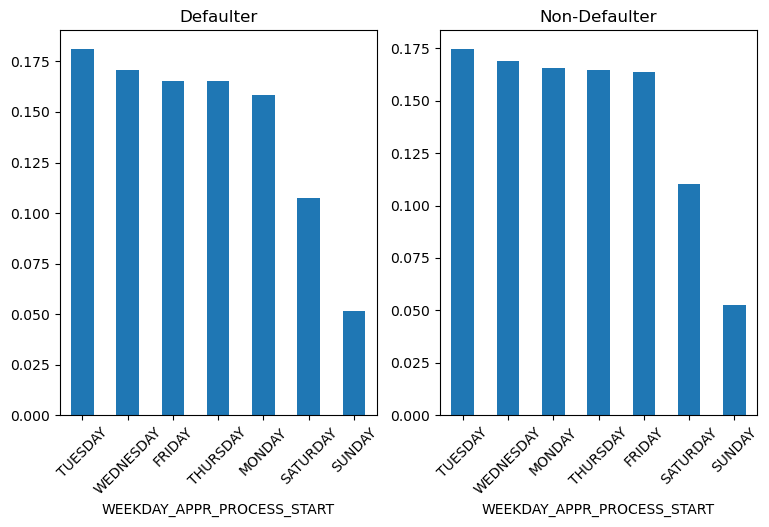

In [49]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.savefig("fig3")
plt.show()


Conclusion

From the graph I conclude that application starting process are less in weekend as compare to weekdays.

#### Performing Univariate analysis on "NAME_CONTRACT_TYPE"  for defaulters and Non-defaulters.

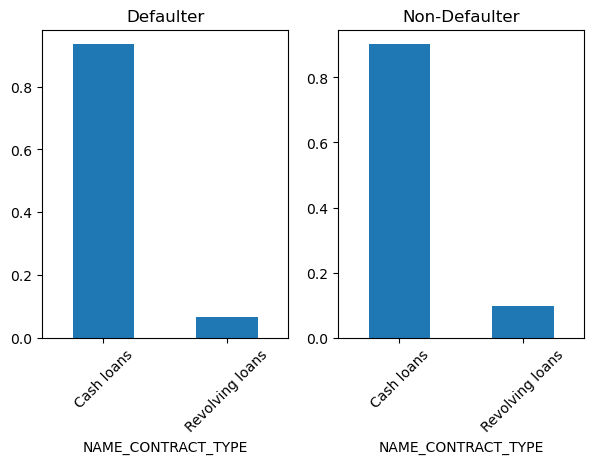

In [50]:
plt.figure(figsize=[7,4])
plt.subplot(1,2,1)
target1["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.show()


Conclusion

We conclude that the 80% of loan are the cash loan for both Defaulter and Non-Defaulter whereas the revolving loans are 20% for both.

#### Performing Univariate analysis on "NAME_EDUCATION_TYPE"  for defaulters and Non-defaulters.

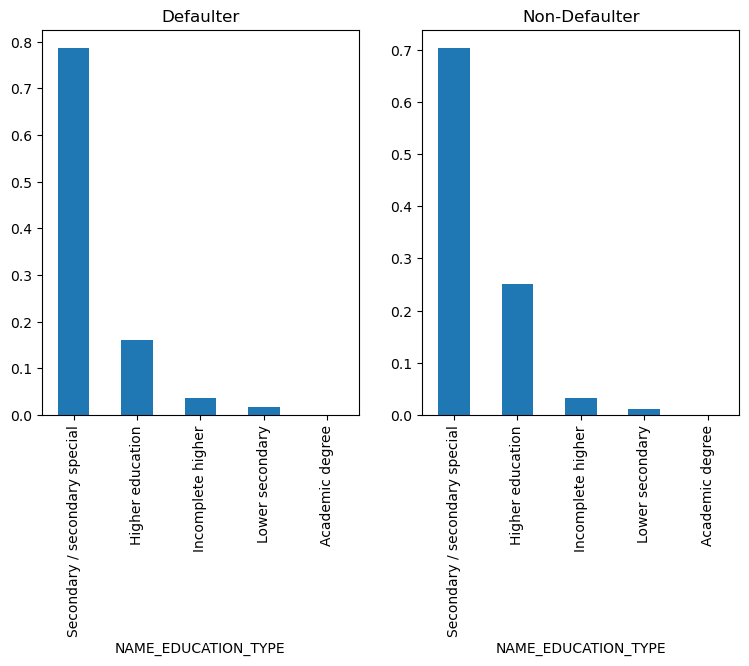

In [51]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig4")
plt.show()

Conclusion

1. Secondary/secondary special people has applied the most loan as compared to other categories for Defaulter as well as Non-Defaulter.
2. Non-Defaulter has a higher percentage of customers with higher education.

#### Performing Univariate analysis on "NAME_FAMILY_STATUS"  for defaulters and Non-defaulters.

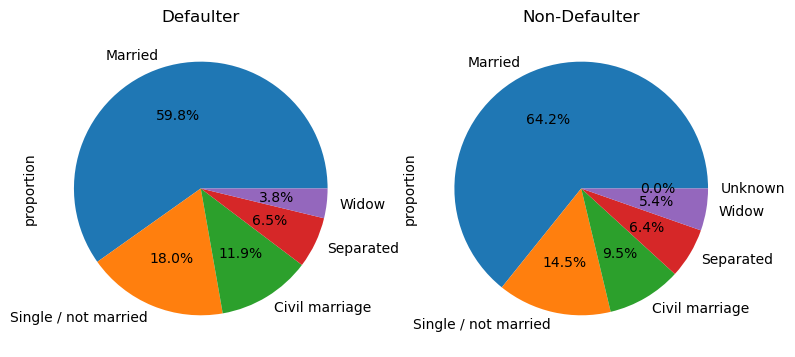

In [52]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig5")
plt.show()

Conclusion

1. Married people tends to take more loan compared to other categories for both Target0 and Target1.
2. Defaulter has a higher percentage of people who are single/not married

#### Performing Univariate analysis on "OCCUPATION_TYPE"  for defaulters and Non-defaulters.

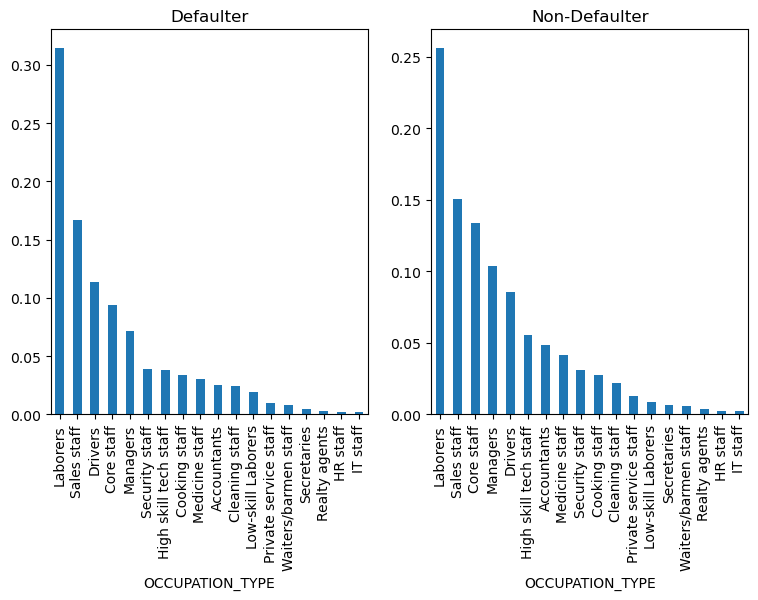

In [53]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig6")
plt.show()

Conclusion

Defaulter
1. Laborers, Sales staff, Drivers and Core staff are the top 4 among the different occupation type.
2. Some occupation type like Realty agents, HR staff and IT staff have lower representation as compared to other occupation type.

Non-Defaulter
1. The distribution of occupation type of non-defaulter are similar to the customers who are doing default.
2. Laborers, Sales staff, Drivers and Core staff are the common one

#### Performing Univariate analysis on "REGION_RATING_CLIENT_W_CITY"  for defaulters and Non-defaulters.

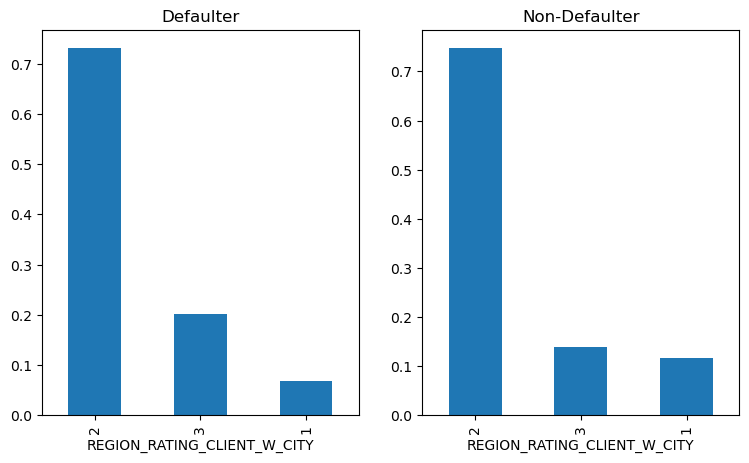

In [54]:
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
target1["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
target0["REGION_RATING_CLIENT_W_CITY"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig7")
plt.show()

Conclusion

Customers with rating 3 has a higher percentage of Defaulter as compared to Non_Defaulter.

#### Univariate analysis for Numerical columns

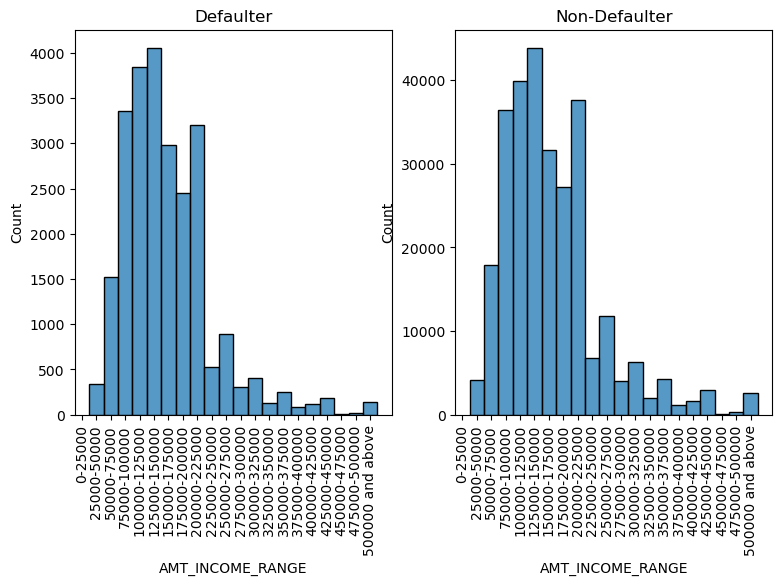

In [55]:
# Performing univariate analysis for the num col "AMT_INCOME_RANGE" for Defaulters and Non-defaulters
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
sns.histplot(data=target1, x="AMT_INCOME_RANGE")
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
sns.histplot(data=target0, x="AMT_INCOME_RANGE")
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig8")
plt.show()

Conclusion-


1.Income range from 100000 to 225000 is having more number of credits  

2.Very less count for income range 400000 and above.


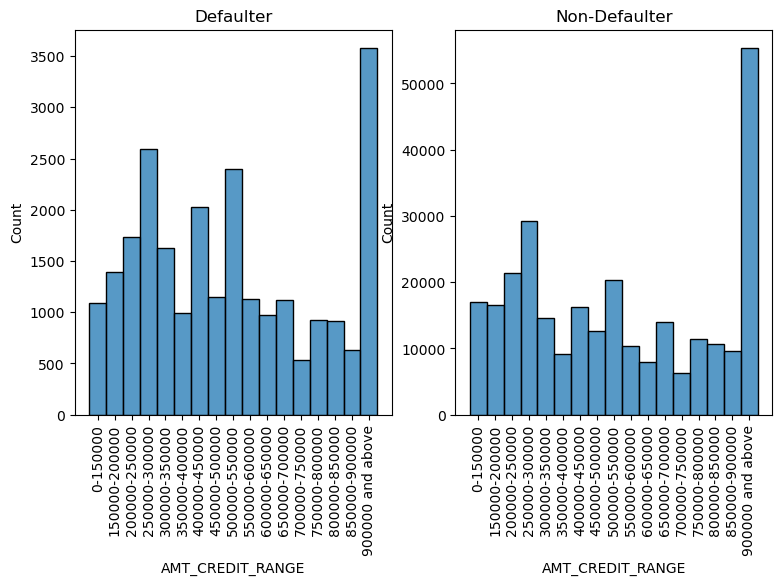

In [56]:
# Performing univariate analysis for the num col "AMT_CREDIT_RANGE" for Defaulters and Non-defaulters
plt.figure(figsize=[9,5])
plt.subplot(1,2,1)
sns.histplot(data=target1, x="AMT_CREDIT_RANGE")
plt.xticks(rotation=90)
plt.title("Defaulter")
plt.subplot(1,2,2)
sns.histplot(data=target0, x="AMT_CREDIT_RANGE")
plt.xticks(rotation=90)
plt.title("Non-Defaulter")
plt.savefig("fig9")
plt.show()

Conclusion

1.Credit range from 900000 and above having more number of counts for both defaulter and non-defaulter.

2.Very less count for income range 700000 to 750000.

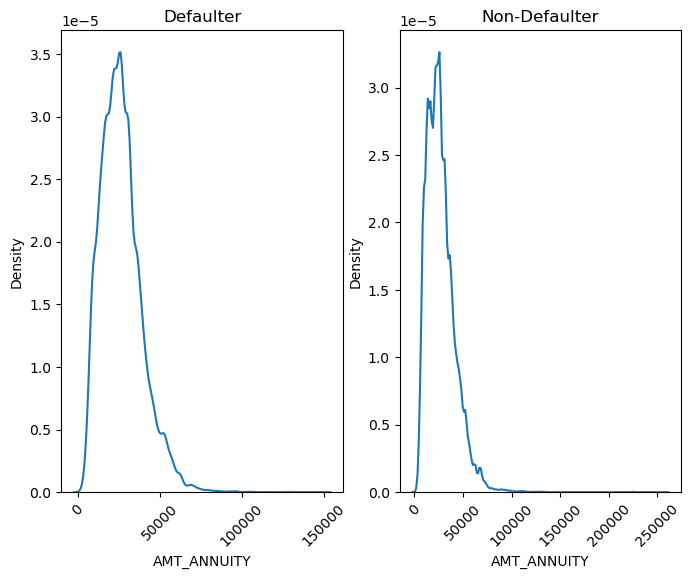

In [57]:
# Distribution of Credit amount for Defaulter and Non-defaulter
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
sns.distplot(target1["AMT_ANNUITY"].dropna(),hist=False,label="target0")
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
sns.distplot(target0["AMT_ANNUITY"].dropna(),hist=False,label="target0")
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.savefig("fig10")
plt.show()

Conclusion

People who has low amount of annuity takes more loan.

### Bivariate analysis

#### Bivariate analysis between numerical and categorical columns

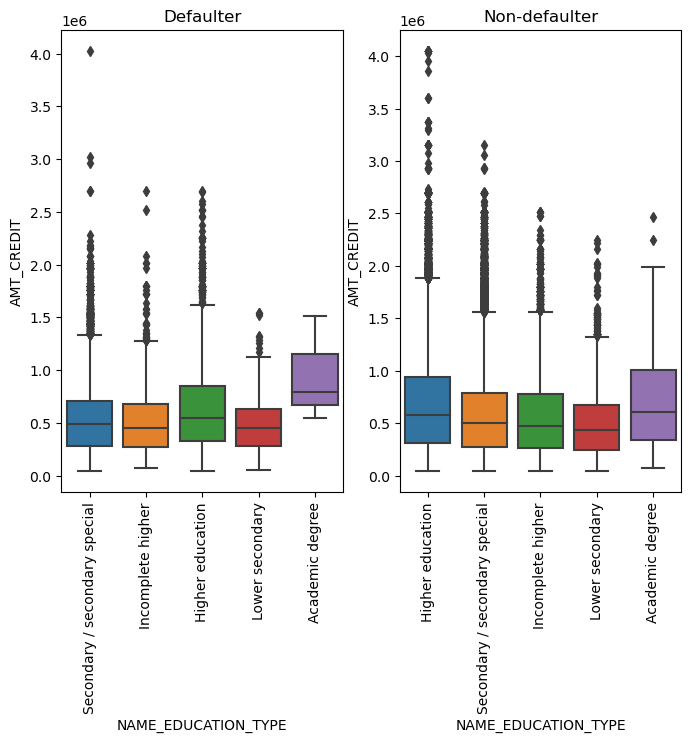

In [58]:
# Performing bivariate analysis between 'NAME_EDUCATION_TYPE' and 'AMT_CREDIT'
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.boxplot(data=target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.title('Defaulter')
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.boxplot(data=target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT')
plt.title('Non-defaulter')
plt.savefig("fig11")
plt.show()

Conclusion

Defaulter

1. Outliers present across all education types except Academic degree, suggesting the presence of some unusually high
or low values. 

2. The boxplot provides a visual representation of how credit amounts are distributed among customers experiencing 
payment difficulties,by their respective education types.

3. Individuals with higher education,Academic degree and Higher education demonstrate a varied range 
of credit amounts.

4. Lower Secondary have lower median compared to other education type.

Non-Defaulters

1. Outliers present across all education types, suggesting the presence of some unusually high
or low values. 

2. There are many outlier present in Higher education and Secondary education

3. The boxplot provides a visual representation of how credit amounts are distributed among customers


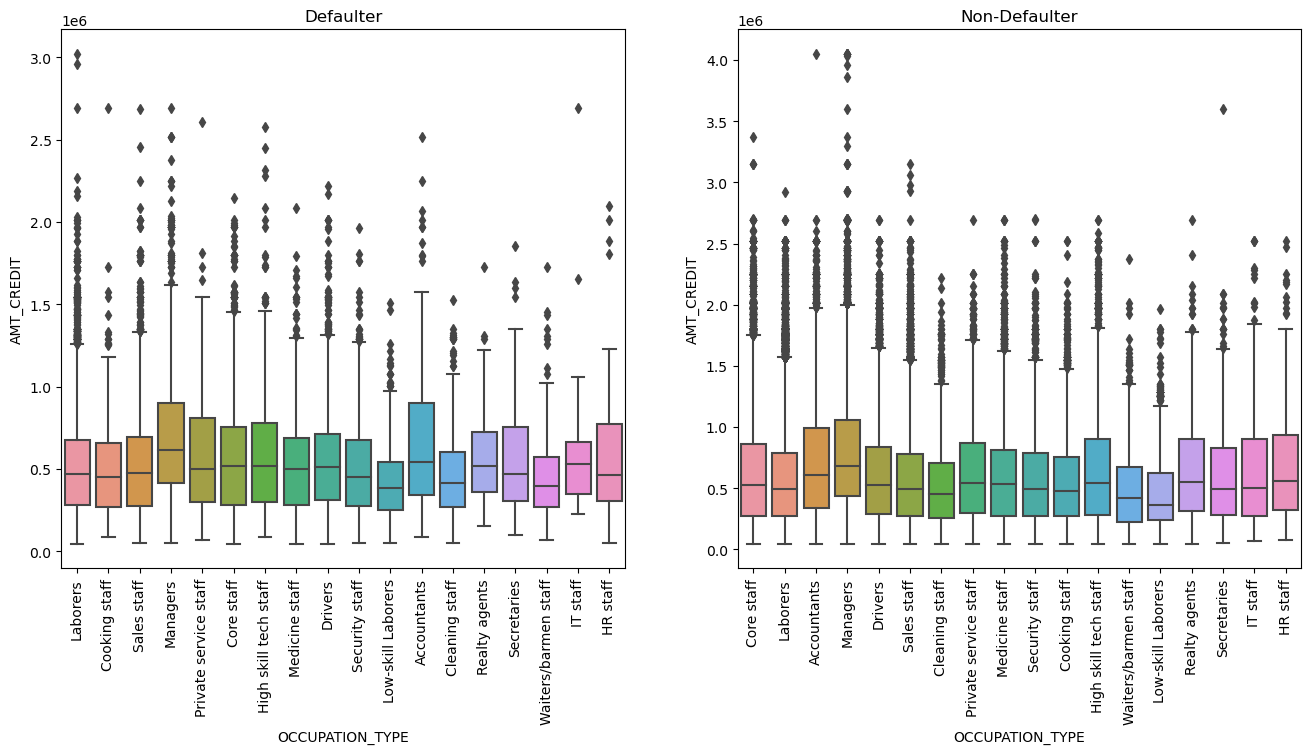

In [59]:
# Performing bivariate analysis between 'OCCUPATION_TYPE' and 'AMT_CREDIT'
plt.figure(figsize=[16,7])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.boxplot(data=target1,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.title('Defaulter')
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.boxplot(data=target0,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.title('Non-Defaulter')
plt.savefig("fig12")
plt.show()

Conclusion

Defaulter

1. The boxplot illustrates the dispersion of credit amounts among customers experiencing payment difficulties, 
categorized by occupation type.
2. "Managers","Accountants", "Realty agents", and "IT staff" occupations show higher median credit amounts.
3. Outliers are visible in all occupation types, indicating significant deviations in credit amounts for specific individuals.

Non-Defaulter

1. The boxplot illustrates the dispersion of credit amounts among customers, who do not face payment difficulties based on 
their occupation type.
2. "Managers","Accountants", "Realty agents", and "IT staff" occupations show higher median credit amounts.
3. Outliers are visible in all occupation types, indicating significant deviations in credit amounts for specific individuals.


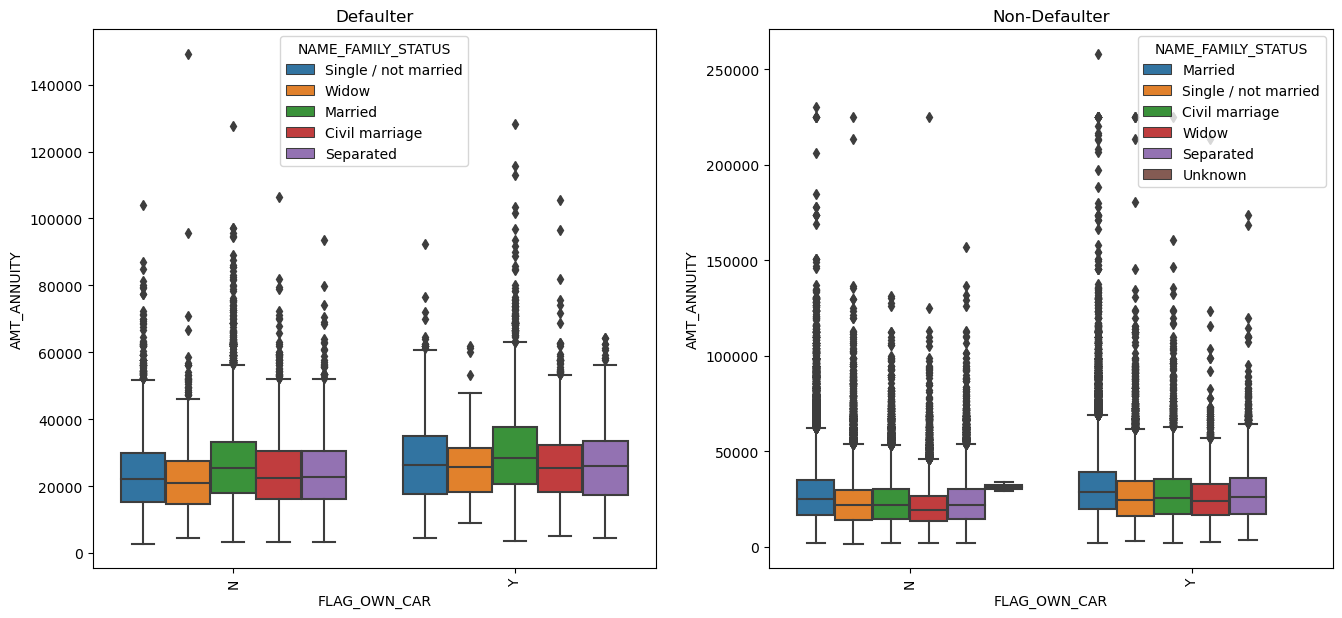

In [60]:
# Performing bivariate analysis between 'NAME_INCOME_TYPE' and 'AMT_CREDIT'
plt.figure(figsize=[16,7])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.boxplot(data=target1,x='FLAG_OWN_CAR',y='AMT_ANNUITY',hue="NAME_FAMILY_STATUS")
plt.title('Defaulter')
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.boxplot(data=target0,x='FLAG_OWN_CAR',y='AMT_ANNUITY',hue="NAME_FAMILY_STATUS")
plt.title('Non-Defaulter')
plt.savefig("fig12")
plt.show()

### Bivariate analysis between Categorical Columns

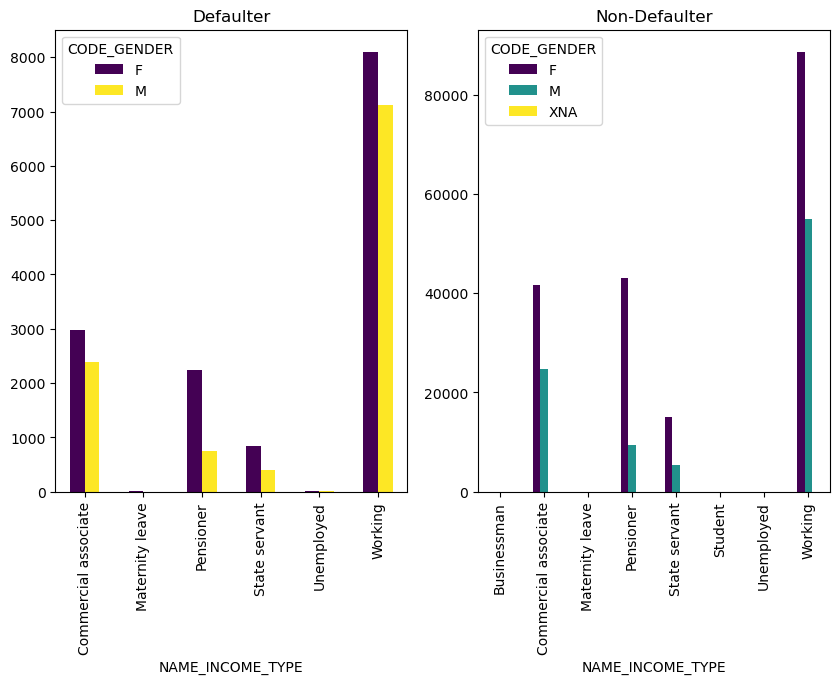

In [61]:
# Performing bivariate analysis between 'NAME_INCOME_TYPE' and 'CODE_GENDER'
plt.figure(figsize=[10,6])
plt.subplot(1, 2, 1)
table_1 = pd.crosstab(target1['NAME_INCOME_TYPE'], target1['CODE_GENDER'])
table_1.plot(kind='bar', cmap='viridis', ax=plt.gca())  
plt.title('Defaulter')
plt.subplot(1, 2, 2)
table_2 = pd.crosstab(target0['NAME_INCOME_TYPE'], target0['CODE_GENDER'])
table_2.plot(kind='bar', cmap='viridis', ax=plt.gca())  # Use ax parameter to specify the subplot
plt.title('Non-Defaulter')
plt.savefig("fig13")

plt.show()


Conclusion

Defaulter
1. Female counts are higher as compared to male.
2. Customers who are from income type 'Working' are facing difficulties for paying the loan.

Non-Defaulter

Female counts are higher as compared to male.



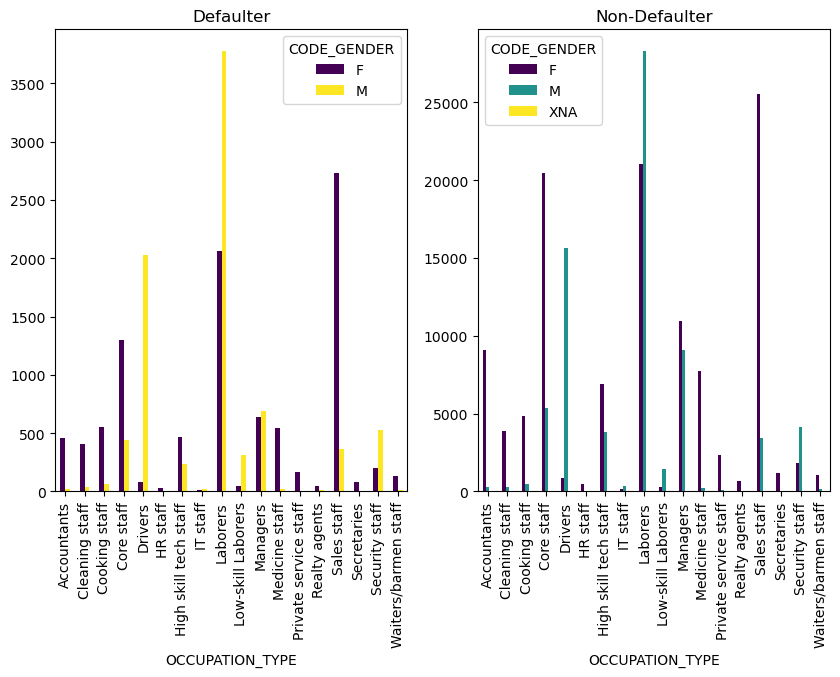

In [62]:
# Performing bivariate analysis between 'NAME_OCCUPATION_TYPE' and 'CODE_GENDER'
plt.figure(figsize=[10,6])
plt.subplot(1, 2, 1)
table_1 = pd.crosstab(target1['OCCUPATION_TYPE'], target1['CODE_GENDER'])
table_1.plot(kind='bar', cmap='viridis', ax=plt.gca())  # Use ax parameter to specify the subplot
plt.title('Defaulter')
plt.subplot(1, 2, 2)
table_2 = pd.crosstab(target0['OCCUPATION_TYPE'], target0['CODE_GENDER'])
table_2.plot(kind='bar', cmap='viridis', ax=plt.gca())  # Use ax parameter to specify the subplot
plt.title('Non-Defaulter')
plt.savefig("fig14")

plt.show()


Conclusion:

1.  Male counts are more compared to female
      and male are more in defaulter than female.

2. Male people from occupation type like 
     “Laborers” and “Drivers” are doing more
       default.


### Bivariate analysis between Numerical Columns

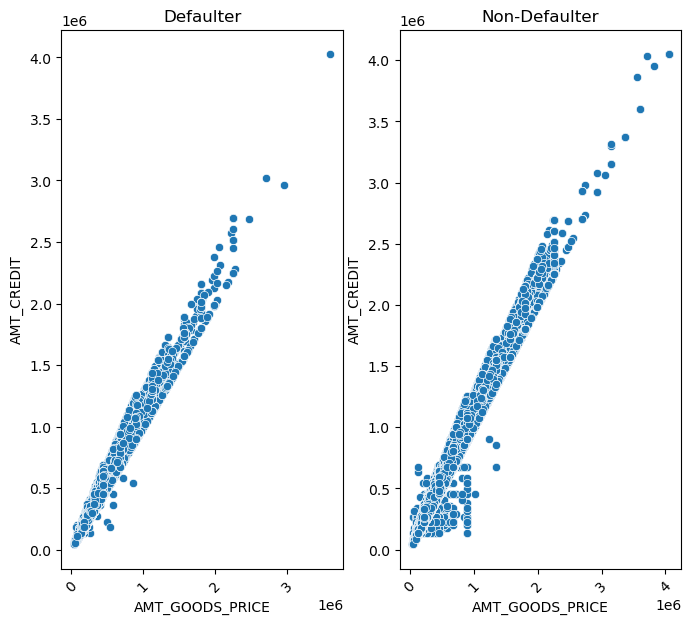

In [63]:
plt.figure(figsize=[8,7])
plt.subplot(1,2,1)
sns.scatterplot(x=target1["AMT_GOODS_PRICE"], y=target1["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
sns.scatterplot(x=target0["AMT_GOODS_PRICE"], y=target0["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.savefig("fig15")
plt.show()



Conclusion

Defaulter
1. From the graph, we conclude that their are positive correlation between AMT_GOODS_PRICE and AMT_CREDIT.
2. Higher the goods price, higher the credit amount

Non-Defaulter
1. Graph shows a positive correlation between AMT_GOODS_PRICE and AMT_CREDIT for Non-Defaulter also.
2. Higher the goods price, higher the credit amount.

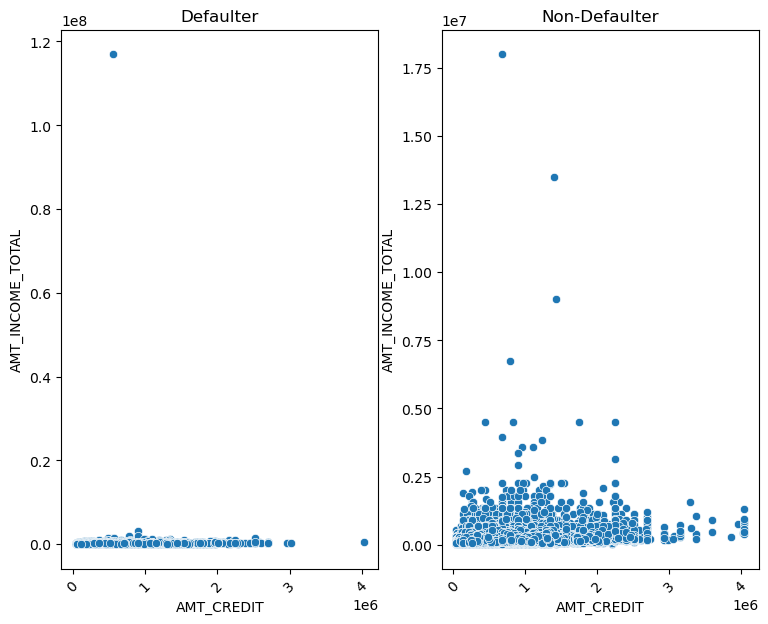

In [64]:
plt.figure(figsize=[9,7])
plt.subplot(1,2,1)
sns.scatterplot(y=target1["AMT_INCOME_TOTAL"], x=target1["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Defaulter")
plt.subplot(1,2,2)
sns.scatterplot(y=target0["AMT_INCOME_TOTAL"], x=target0["AMT_CREDIT"])
plt.xticks(rotation=45)
plt.title("Non-Defaulter")
plt.show()



Conclusion

low income people with low credit range are more likely to default.

In [65]:
Cont_col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'YEAR_BIRTH',
       'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE']

In [66]:
target0[Cont_col].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062597,-0.140389,-0.064963,-0.022840,0.139598,-0.072401,0.016485,0.181891,0.015393,0.016431,0.125714,-0.041338
AMT_CREDIT,0.342799,1.000000,0.771309,0.987250,0.100604,0.047426,-0.070102,-0.013409,0.001405,0.129140,0.036085,0.005943,0.102921,0.004842,0.005480,0.072281,-0.069540
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012202,-0.104974,-0.039397,-0.014074,0.126615,0.028051,0.014059,0.130944,0.013588,0.013679,0.090966,-0.062013
AMT_GOODS_PRICE,0.349462,0.987250,0.776686,1.000000,0.103827,0.044601,-0.068607,-0.015843,0.003587,0.135694,0.038908,0.006982,0.107686,0.005875,0.006597,0.076616,-0.071373
REGION_POPULATION_RELATIVE,0.167851,0.100604,0.120988,0.103827,1.000000,0.025168,-0.007200,0.052028,0.001193,0.198493,-0.012486,-0.006282,0.325347,-0.006421,-0.006307,0.203852,-0.041164
YEAR_BIRTH,-0.062597,0.047426,-0.012202,0.044601,0.025168,1.000000,0.625824,0.332980,0.271571,0.078135,0.197278,-0.001948,-0.007210,-0.001686,-0.002058,-0.005142,-0.076492
YEAR_EMPLOYED,-0.140389,-0.070102,-0.104974,-0.068607,-0.007200,0.625824,1.000000,0.214324,0.275920,-0.028535,0.111990,0.007803,-0.020250,0.007890,0.007564,-0.018391,0.023379
YEAR_REGISTRATION,-0.064963,-0.013409,-0.039397,-0.015843,0.052028,0.332980,0.214324,1.000000,0.100508,0.052451,0.103534,-0.012268,-0.054609,-0.009735,-0.012224,-0.022619,-0.053472
YEAR_ID_PUBLISH,-0.022840,0.001405,-0.014074,0.003587,0.001193,0.271571,0.275920,0.100508,1.000000,0.041573,0.124536,0.003276,0.007646,0.002519,0.003073,0.009935,-0.082672
EXT_SOURCE_2,0.139598,0.129140,0.126615,0.135694,0.198493,0.078135,-0.028535,0.052451,0.041573,1.000000,0.084597,0.006790,0.132625,0.006439,0.006791,0.091300,-0.188399


In [67]:
target1[Cont_col].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037583,0.009135,-0.002872,-0.014967,0.000144,0.004242,0.007154,-0.015110,0.001642,0.009801,0.001530,0.001636,0.006451,-0.002429
AMT_CREDIT,0.038131,1.000000,0.752195,0.983103,0.069161,0.135318,0.001933,0.025925,0.052461,0.120848,0.077698,0.006840,0.090926,0.000958,0.005950,0.067370,-0.110851
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752699,0.071690,0.014249,-0.081203,-0.034240,0.016781,0.116305,0.041415,0.001732,0.107146,-0.002979,0.001626,0.073045,-0.079870
AMT_GOODS_PRICE,0.037583,0.983103,0.752699,1.000000,0.076049,0.135744,0.006647,0.025712,0.056084,0.131184,0.078754,0.006178,0.097623,0.000319,0.005336,0.073896,-0.118303
REGION_POPULATION_RELATIVE,0.009135,0.069161,0.071690,0.076049,1.000000,0.048294,0.015543,0.056255,0.016089,0.169751,-0.009810,-0.016963,0.261106,-0.017182,-0.017148,0.157830,-0.055139
YEAR_BIRTH,-0.002872,0.135318,0.014249,0.135744,0.048294,1.000000,0.581765,0.288783,0.252790,0.108829,0.171801,0.004934,0.030254,0.002986,0.005417,0.018953,-0.111014
YEAR_EMPLOYED,-0.014967,0.001933,-0.081203,0.006647,0.015543,0.581765,1.000000,0.192358,0.228181,0.001103,0.096226,0.015445,0.021671,0.014887,0.015435,0.015261,-0.001409
YEAR_REGISTRATION,0.000144,0.025925,-0.034240,0.025712,0.056255,0.288783,0.192358,1.000000,0.096841,0.070023,0.086031,-0.001032,-0.002001,-0.001148,-0.001649,0.009592,-0.071696
YEAR_ID_PUBLISH,0.004242,0.052461,0.016781,0.056084,0.016089,0.252790,0.228181,0.096841,1.000000,0.059589,0.127796,0.002277,0.012388,0.000738,0.001984,0.003449,-0.123376
EXT_SOURCE_2,0.007154,0.120848,0.116305,0.131184,0.169751,0.108829,0.001103,0.070023,0.059589,1.000000,0.077760,0.016582,0.113081,0.011440,0.015798,0.088493,-0.207900


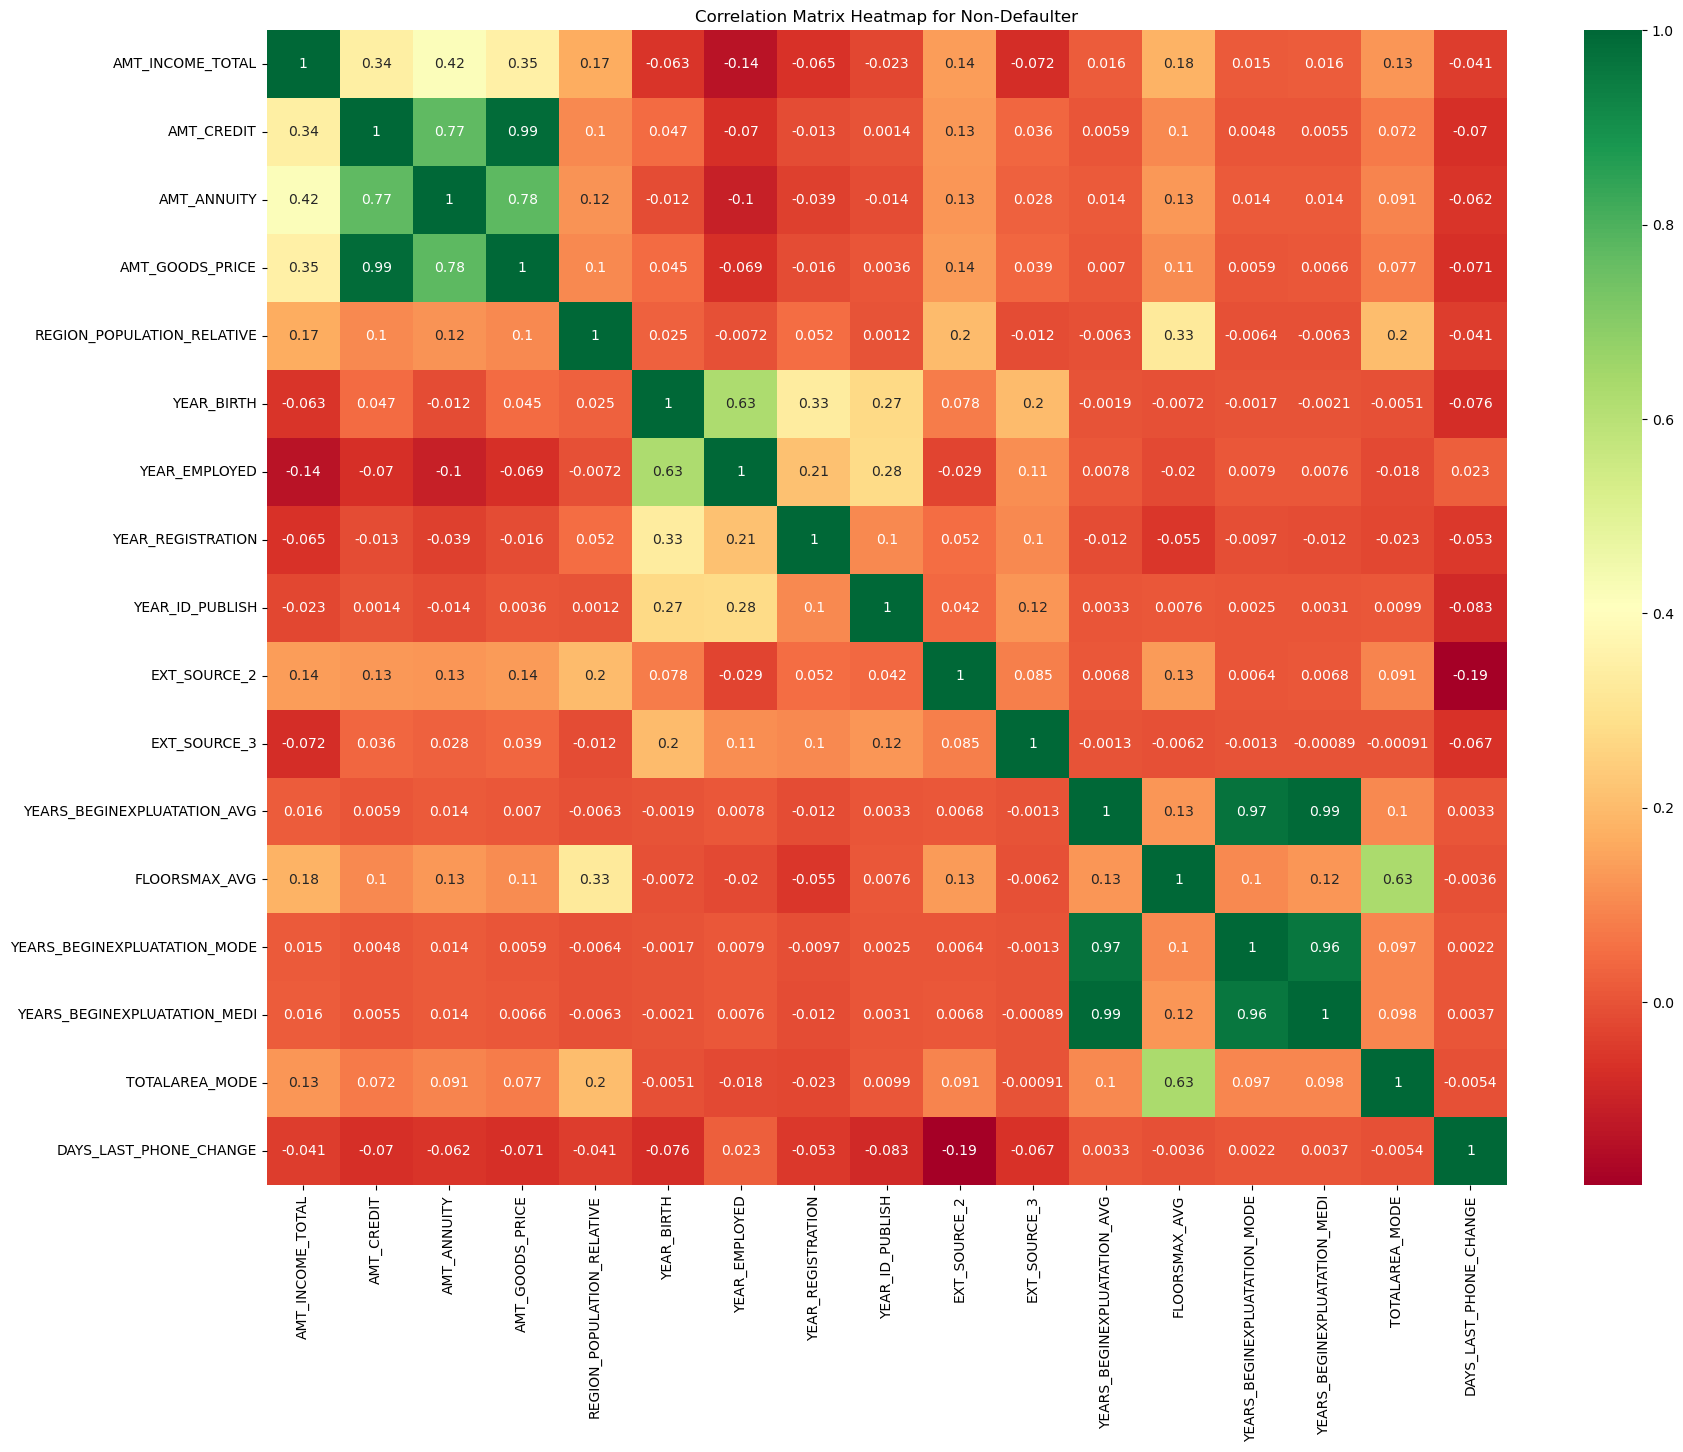

In [68]:
# Create a heatmap for Non-Defaulters
plt.figure(figsize=(20, 15))
sns.heatmap(target0[Cont_col].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix Heatmap for Non-Defaulter')
plt.savefig("fig16")
plt.show()

Conclusion

These columns having high correlation values for Target0

        -AMT_GOODS_PRICE and AMT_CREDIT
        -YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG
        -YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_AVG
        -YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_MEDI
        -AMT_ANNUITY and AMT_CREDIT
        



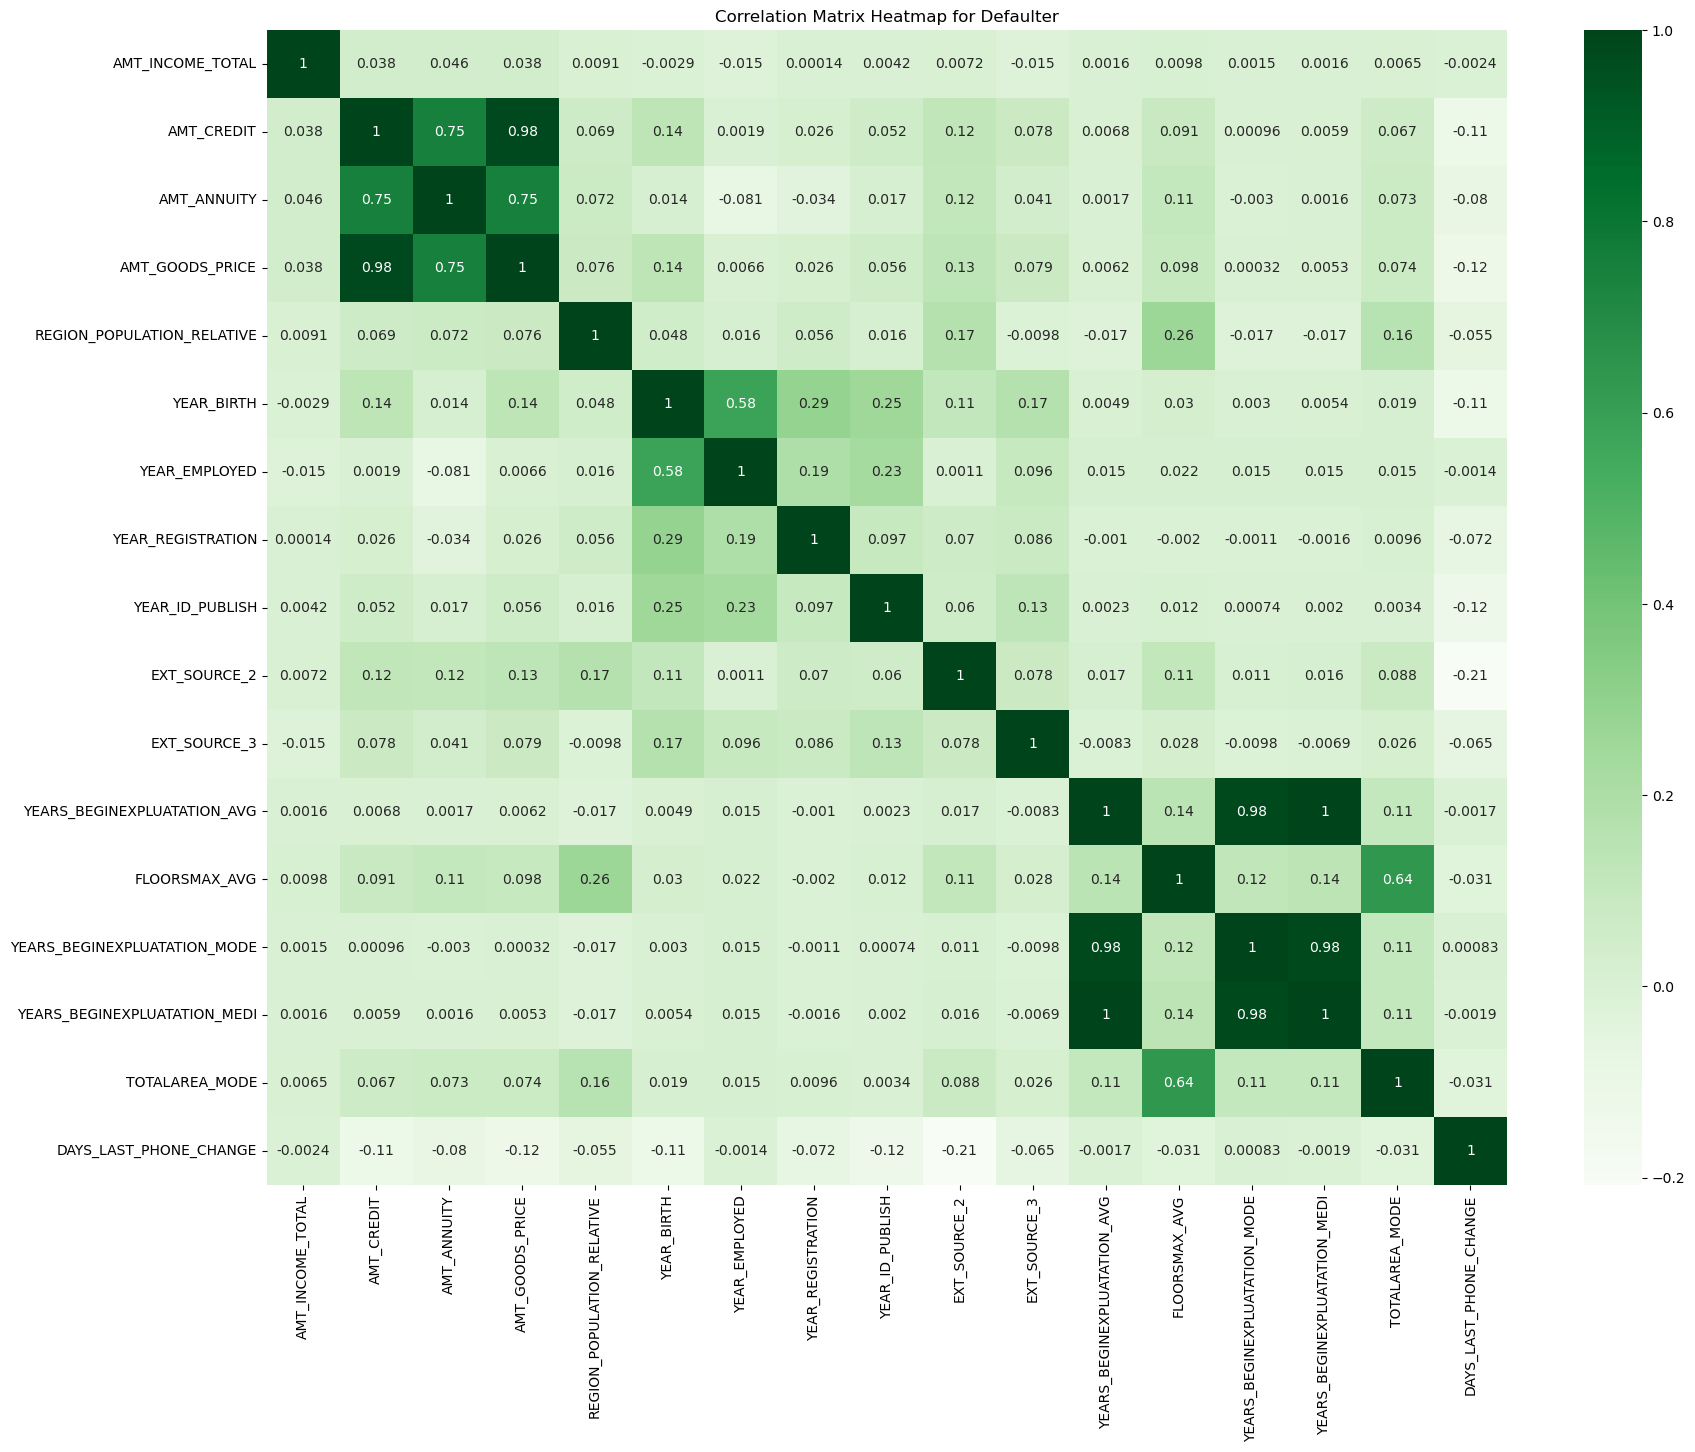

In [69]:
# Create a heatmap for Defaulters
plt.figure(figsize=(20, 15))
sns.heatmap(target1[Cont_col].corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix Heatmap for Defaulter')
plt.savefig("fig17")
plt.show()

Conclusion

These columns having high correlation values for Target1

        -AMT_GOODS_PRICE and AMT_CREDIT
        -YEARS_BEGINEXPLUATATION_MEDI and YEARS_BEGINEXPLUATATION_AVG
        -YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_AVG
        -YEARS_BEGINEXPLUATATION_MODE and YEARS_BEGINEXPLUATATION_MEDI
        -AMT_ANNUITY and AMT_CREDIT
        

### Segment2- previous_appliaction

In [70]:
# Reading the dataset of previous_application in df2 dataframe
df2 = pd.read_csv("previous_application.csv")
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Descriptive Statistics
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [72]:
# check info of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
df2.shape

(1670214, 37)

### Data cleaning

In [74]:
# Checking the null values present in each column of the DataFrame
df2.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [75]:
# let us check the columns which have null values greater than 50%
cols_to_drop = df2.columns[df2.isnull().mean()*100>50]
cols_to_drop

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [76]:
# Drop the columns which have more than 40% of null values
df2=df2.drop(cols_to_drop,axis=1)

In [77]:
# Let us check the shape of the dataframe after removing columns
df2.shape

(1670214, 33)

In [78]:
# merging the appliaction data with previous application dataset
merged_data=pd.merge(left=df1,right=df2,on="SK_ID_CURR",how="inner")
merged_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_REGISTRATION,YEAR_ID_PUBLISH,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,250000-275000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,250000-275000,900000 and above,2636178,Consumer loans,64

In [79]:
# Check the shape of merge data after merging
merged_data.shape

(1413701, 119)

In [80]:
# Check the columns of merged_data after merging
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=119)

In [81]:
merged_data.isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 119, dtype: float64

### Approach of imputing missing values

When addressing missing values, the imputation strategy varies for numerical and categorical columns are different. 
For numerical columns, utilizing the median or mean for imputation is common. Imputing the median value is considered a
superior approach compared to using the mean, as the median is less sensitive to outliers, resulting in a more robust imputation method."For categorical columns, mode is the best method for imputation

### Performing univariate analysis

In [82]:
merged_data["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64

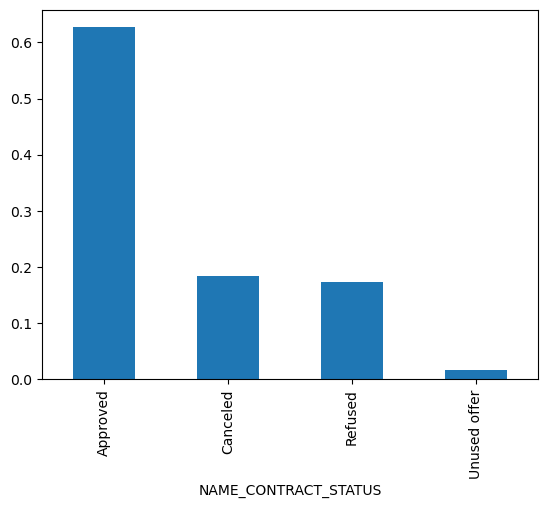

In [83]:
merged_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.show()

In [84]:
merged_data["NAME_CASH_LOAN_PURPOSE"].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 786937
XNA                                 567351
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1042
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                          

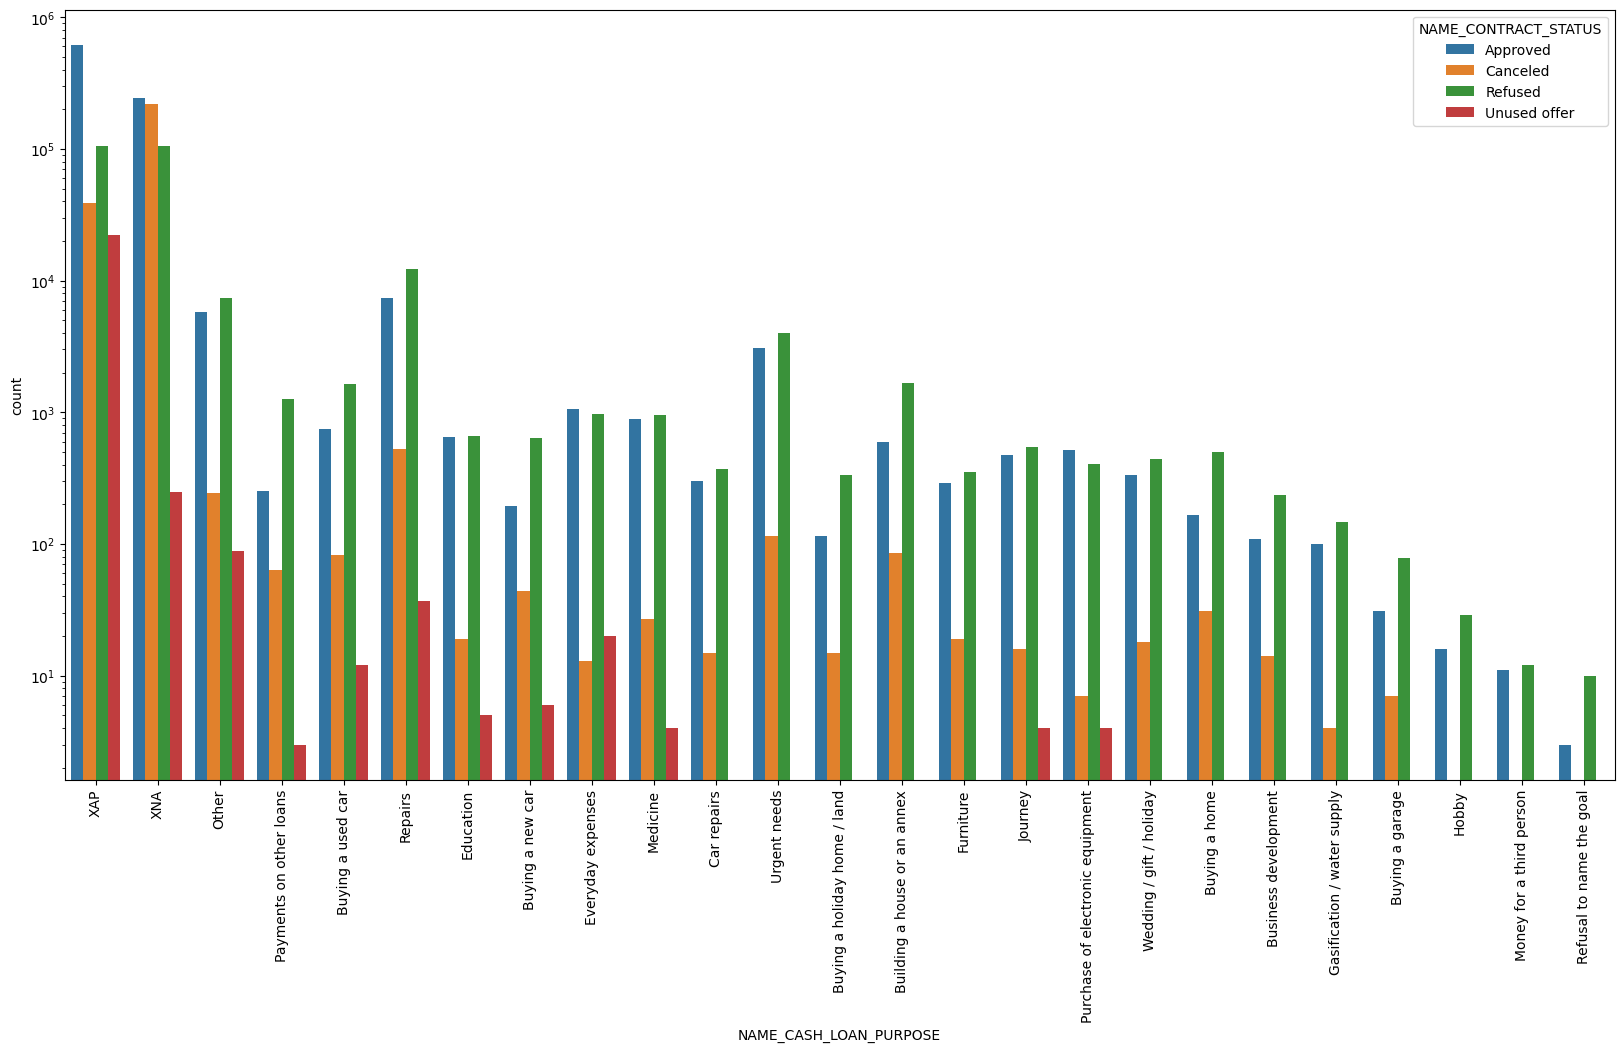

In [85]:
plt.figure(figsize=[20,10])
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue="NAME_CONTRACT_STATUS", data=merged_data)
plt.xticks(rotation=90)
plt.yscale("log")
plt.savefig("fig18")
plt.show()

Conclusion

1. Most approval of loan came from Repairs.
2. Most rejection of loan too came from Repairs.
3. Equal number of approval and rejection came from Education,Everyday expenses, Medicine and Car repairs.

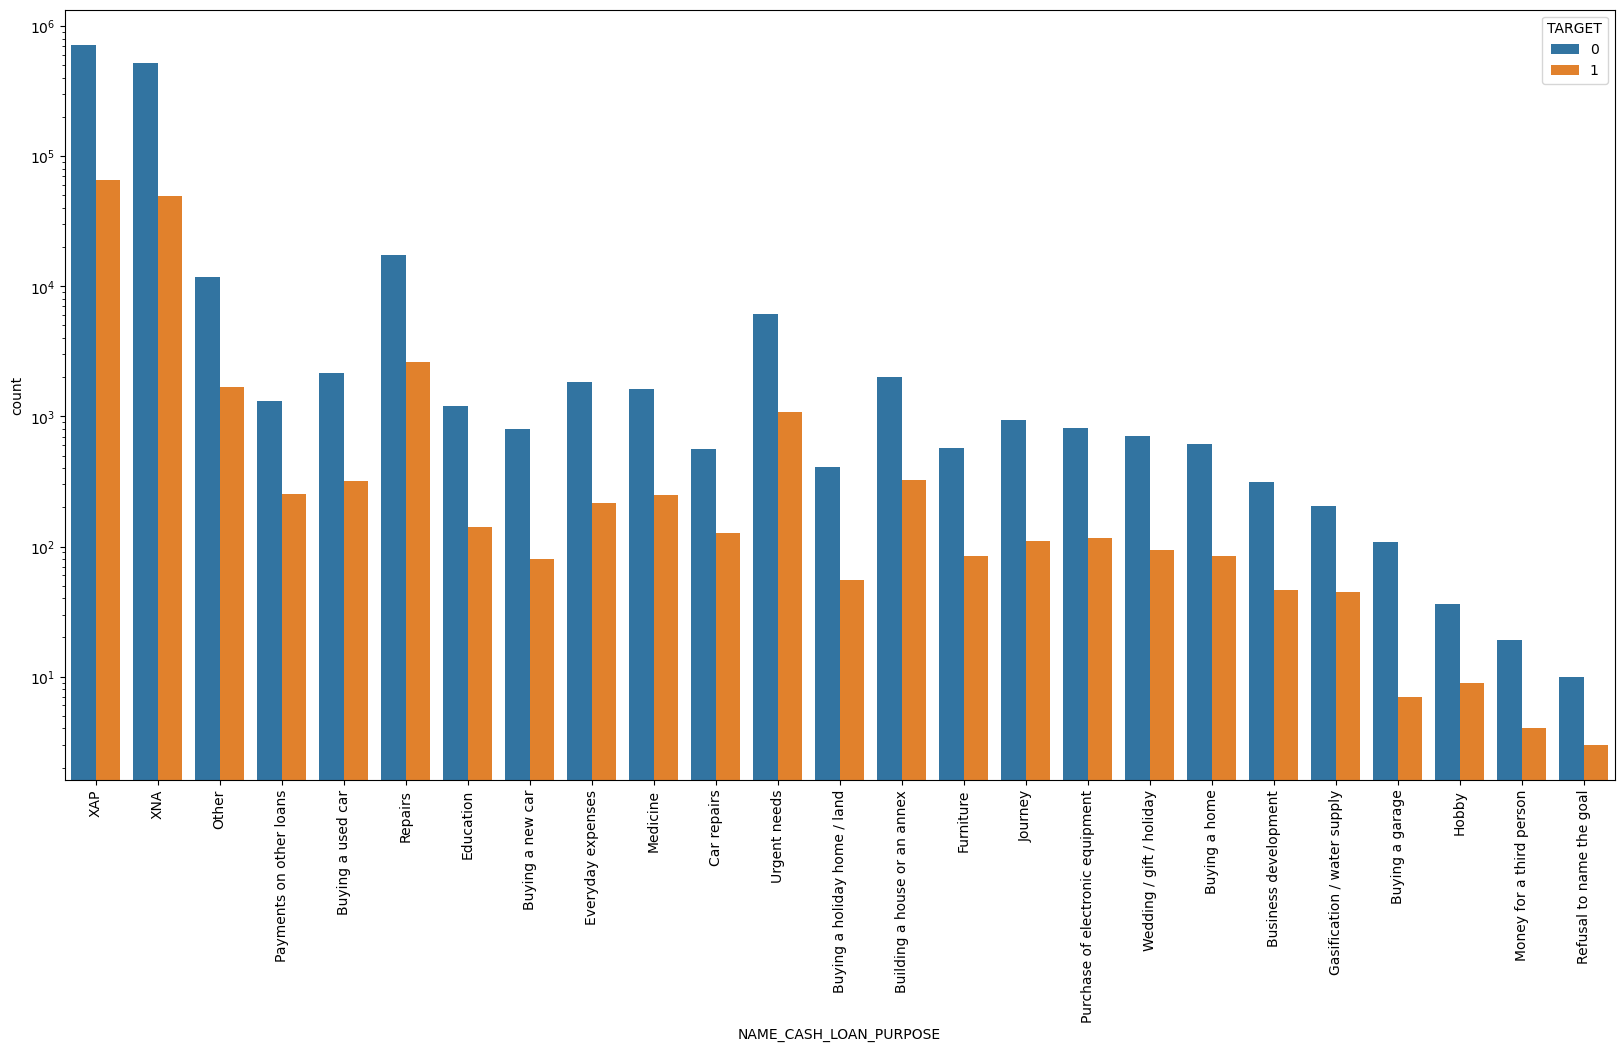

In [86]:
plt.figure(figsize=[20,10])
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue="TARGET", data=merged_data)
plt.xticks(rotation=90)
plt.yscale("log")
plt.savefig("fig19")
plt.show()

Conclusion

From the graph we conclude that loan purpose "Repairs" and "Urgent needs" are facing more difficulties in paying the loan on time.

### Bivariate Analysis

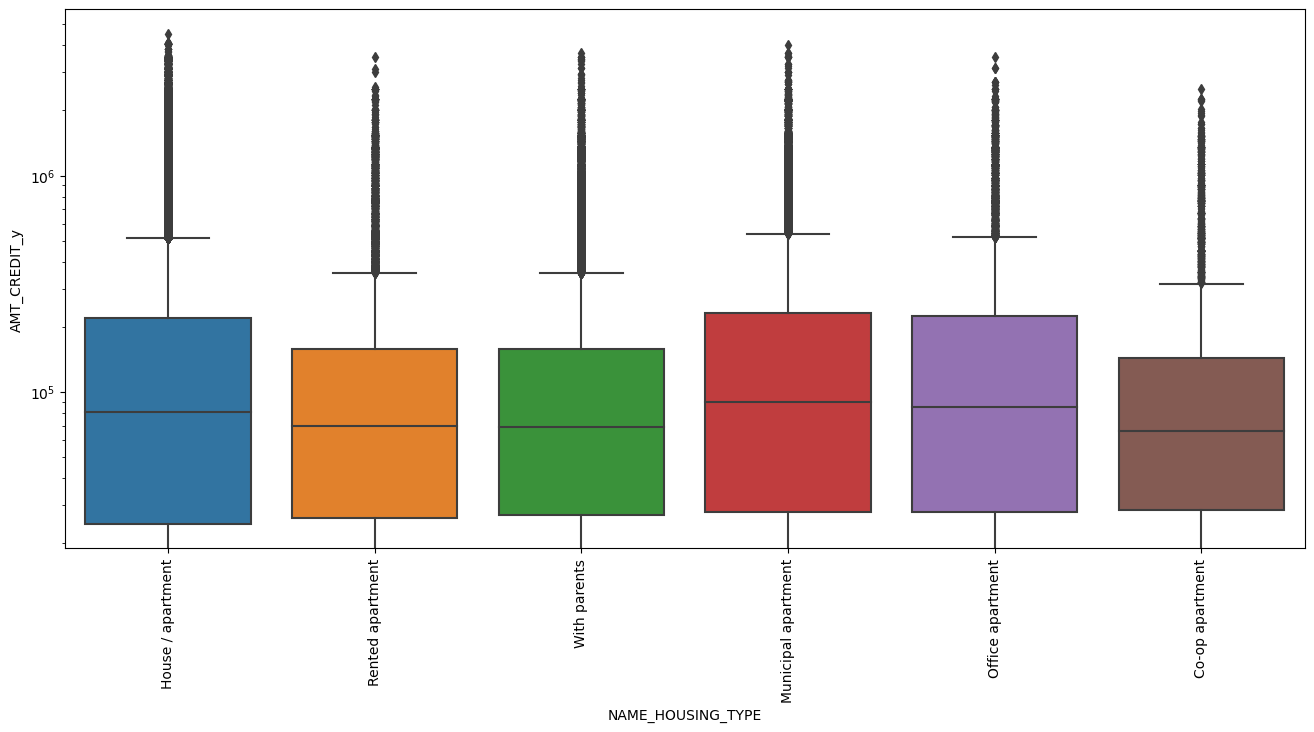

In [87]:
plt.figure(figsize=[16,7])
plt.xticks(rotation=90)
sns.boxplot(data=merged_data,x="NAME_HOUSING_TYPE",y='AMT_CREDIT_y')
plt.yscale("log")
plt.savefig("fig20")
plt.show()


Conclusion

From the graph we can conclude people who live in apartment have taken higher credit